# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [30]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [31]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("API_KEY_MAPBOX")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

## Load Data

In [32]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# Create new dataframe that contains the sum of each dwelling type by year 
to_data_filtered_grouped = to_data.loc[:, "single_detached_house":"other_house"].groupby(["year"]).sum()
to_data_filtered_grouped

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [5]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    data.plot.bar(title=title,xlabel=xlabel,ylabel=ylabel,color=color)


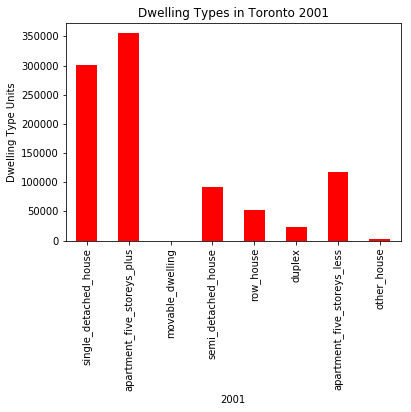

In [6]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001 using the create_bar function
create_bar_chart(
    data = to_data_filtered_grouped.iloc[0,:],
    title = "Dwelling Types in Toronto 2001",
    xlabel = "2001",
    ylabel = "Dwelling Type Units",
    color = "red"
)

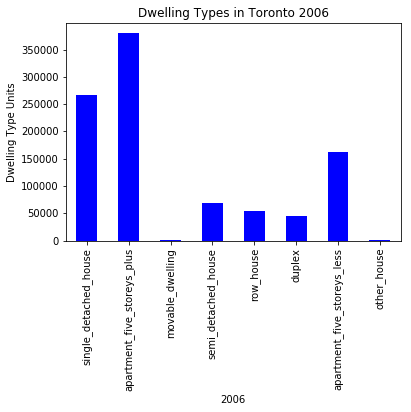

In [7]:
# Bar chart for 2006 using the create_bar function
create_bar_chart(
    data = to_data_filtered_grouped.iloc[1,:],
    title = "Dwelling Types in Toronto 2006",
    xlabel = "2006",
    ylabel = "Dwelling Type Units",
    color = "blue"
)

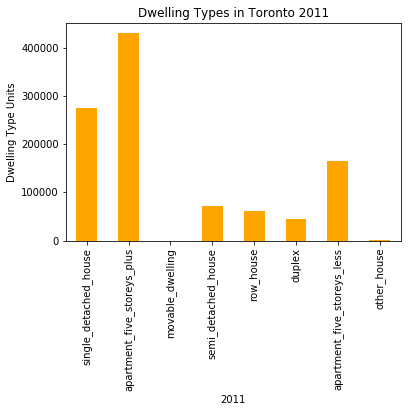

In [8]:
# Bar chart for 2011 using the create_bar function
create_bar_chart(
    data = to_data_filtered_grouped.iloc[2,:],
    title = "Dwelling Types in Toronto 2011",
    xlabel = "2011",
    ylabel = "Dwelling Type Units",
    color = "orange"
)

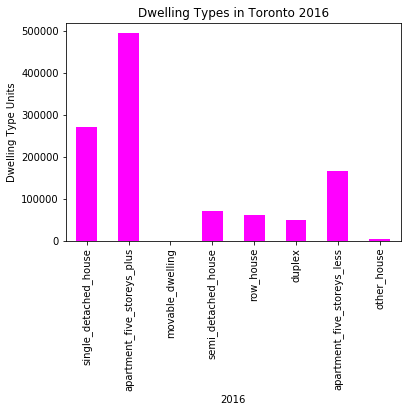

In [9]:
# Bar chart for 2016 using the create_bar function
create_bar_chart(
    data = to_data_filtered_grouped.iloc[3,:],
    title = "Dwelling Types in Toronto 2016",
    xlabel = "2016",
    ylabel = "Dwelling Type Units",
    color = "magenta"
)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [10]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# Create new dataframe that contains only owned and rented dwellings average costs per year
to_data_owned_rented_grouped = to_data[["shelter_costs_owned","shelter_costs_rented"]].groupby(["year"]).mean()
to_data_owned_rented_grouped

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [11]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    data.plot(title=title,xlabel=xlabel,ylabel=ylabel,color=color) 

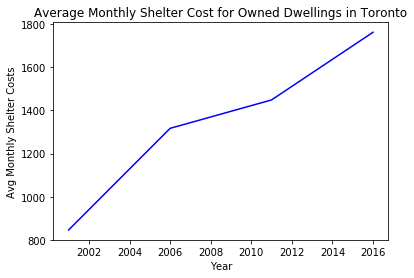

In [12]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(
    data = to_data_owned_rented_grouped["shelter_costs_owned"],
    title = "Average Monthly Shelter Cost for Owned Dwellings in Toronto",
    xlabel = "Year",
    ylabel = "Avg Monthly Shelter Costs",
    color = "blue"
)

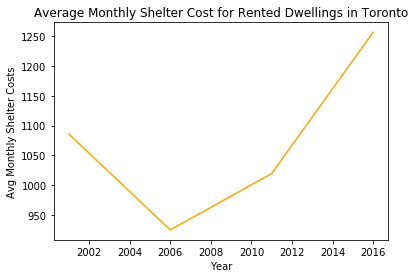

In [13]:
# Line chart for rented dwellings
create_line_chart(
    data = to_data_owned_rented_grouped["shelter_costs_rented"],
    title = "Average Monthly Shelter Cost for Rented Dwellings in Toronto",
    xlabel = "Year",
    ylabel = "Avg Monthly Shelter Costs",
    color = "orange"
)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [14]:
# Calculate the average house value per year
# Create new series that contains the average_house_value per year
average_house_value = to_data["average_house_value"].groupby(["year"]).mean()
average_house_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

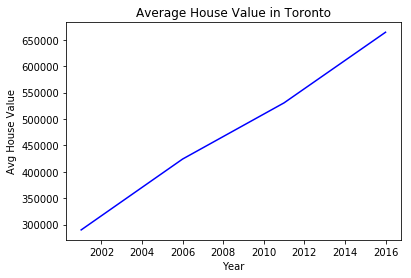

In [15]:
# Plot the average house value per year as a line chart
create_line_chart(
    data = average_house_value,
    title = "Average House Value in Toronto",
    xlabel = "Year",
    ylabel = "Avg House Value",
    color = "blue"
)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [16]:
# Create new dataframe that contains the average_house_value per year for each neighbourhood
avg_house_price_by_neighbourhood =  to_data.loc[:, ["neighbourhood","average_house_value"]].groupby(by=["neighbourhood", "year"]).mean()
avg_house_price_by_neighbourhood.head()

average_house_value
neighbourhood                year                     
Agincourt North              2001             200388.0
                             2006             293140.0
                             2011             366667.0
                             2016             459051.0
Agincourt South-Malvern West 2001             203047.0

In [17]:
# Create and interactive hvplot for average_house_value per year for each neighbourhood
avg_house_price_by_neighbourhood.hvplot(
    x='year', 
    y='average_house_value', 
    xlabel = 'Year', 
    ylabel = 'Average House Value',
    yformatter="%.0f",
    groupby="neighbourhood",
    widget_location='right_top'
)

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
        [1] VSpacer()

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [18]:
# Create new dataframe that contains the average number of dwelling types per year for each neighbourhood
dwelling_types_by_neighbourhood =  to_data.loc[:, "neighbourhood":"other_house"].groupby(by=["neighbourhood", "year"]).mean()
dwelling_types_by_neighbourhood.head()

single_detached_house  \
neighbourhood                year                          
Agincourt North              2001                 3715.0   
                             2006                 3295.0   
                             2011                 3385.0   
                             2016                 3345.0   
Agincourt South-Malvern West 2001                 3250.0   

                                   apartment_five_storeys_plus  \
neighbourhood                year                                
Agincourt North              2001                       1480.0   
                             2006                       2060.0   
                             2011                       2130.0   
                             2016                       2120.0   
Agincourt South-Malvern West 2001                       1835.0   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                year                                          
Agincourt North              2001               0.0               1055.0   
                             2006               0.0                775.0   
                             2011               5.0                820.0   
                             2016               5.0                805.0   
Agincourt South-Malvern West 2001               0.0                545.0   

                                   row_house  duplex  \
neighbourhood                year                      
Agincourt North              2001     1295.0   195.0   
                             2006     1425.0   600.0   
                             2011     1465.0   610.0   
                             2016     1440.0   645.0   
Agincourt South-Malvern West 2001      455.0   105.0   

                                   apartment_five_storeys_less  other_house  
neighbourhood                year                                            
Agincourt North              2001                        185.0          5.0  
                             2006                        565.0          0.0  
                             2011                        705.0         20.0  
                             2016                        735.0         15.0  
Agincourt South-Malvern West 2001                        425.0          0.0

In [19]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwelling_types_by_neighbourhood.hvplot.bar(
    x='year', 
    rot=90,
    xlabel = 'Year', 
    ylabel = 'Dwelling Unit Types',
    yformatter="%.0f",
    groupby="neighbourhood",
    widget_location='right_top',
    height=500
)

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
        [1] VSpacer()

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [20]:
# Create new dataframe that contains the average_house_value for each neighbourhood across all years
average_house_value_by_neighborhood = to_data.loc[:, ["neighbourhood","average_house_value"]].groupby(by=["neighbourhood"]).mean()

# Select the top 10
average_house_value_by_neighborhood_top10 = average_house_value_by_neighborhood.sort_values('average_house_value', ascending=False).head(10)
average_house_value_by_neighborhood_top10.head()

average_house_value
neighbourhood                                         
Bridle Path-Sunnybrook-York Mills           1526485.75
Forest Hill South                           1195992.50
Lawrence Park South                         1094027.75
Rosedale-Moore Park                         1093640.00
St.Andrew-Windfields                         999107.00

In [21]:
# Plotting the data from the top 10 expensive neighbourhoods
average_house_value_by_neighborhood_top10.hvplot.bar(
    title="Top 10 Most Expensive Neighbourhoods in Toronto",
    x='neighbourhood', 
    y='average_house_value',
    rot=90,
    xlabel = 'Neighbourhood', 
    ylabel = 'Avg House Value',
    yformatter="%.0f",
    height=500,
    width=600
)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [22]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.set_index("neighbourhood",inplace=True,drop=True)
df_neighbourhood_locations

lat        lon
neighbourhood                                     
Agincourt North               43.805441 -79.266712
Agincourt South-Malvern West  43.788658 -79.265612
Alderwood                     43.604937 -79.541611
Annex                         43.671585 -79.404001
Banbury-Don Mills             43.737657 -79.349718
...                                 ...        ...
Wychwood                      43.676919 -79.425515
Yonge-Eglinton                43.704689 -79.403590
Yonge-St.Clair                43.687859 -79.397871
York University Heights       43.765736 -79.488883
Yorkdale-Glen Park            43.714672 -79.457108

[140 rows x 2 columns]

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [23]:
# Calculate the mean values for each neighborhood
# For effeciency sake and to re use code we will re use an existing data frame created earlier - "average_house_value_by_neighborhood"
average_house_value_by_neighborhood.head()


average_house_value
neighbourhood                                    
Agincourt North                          329811.5
Agincourt South-Malvern West             334189.0
Alderwood                                427922.5
Annex                                    746977.0
Banbury-Don Mills                        612039.0

In [24]:
# Join the average values with the neighbourhood locations
df_neighbourhood_avg_house_value_locations = pd.concat([average_house_value_by_neighborhood, df_neighbourhood_locations], axis="columns", join="inner")
df_neighbourhood_avg_house_value_locations.head()

average_house_value        lat        lon
neighbourhood                                                          
Agincourt North                          329811.5  43.805441 -79.266712
Agincourt South-Malvern West             334189.0  43.788658 -79.265612
Alderwood                                427922.5  43.604937 -79.541611
Annex                                    746977.0  43.671585 -79.404001
Banbury-Don Mills                        612039.0  43.737657 -79.349718

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

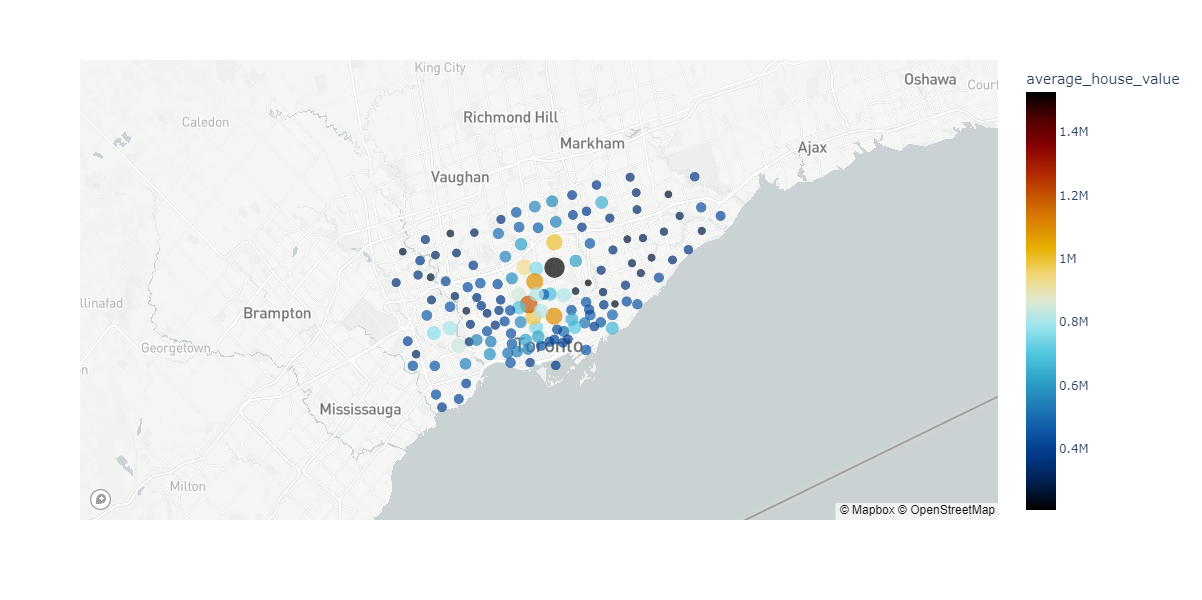

In [25]:
# Create a scatter mapbox to analyze neighbourhood info
fig = px.scatter_mapbox(df_neighbourhood_avg_house_value_locations, 
                        lat="lat", 
                        lon="lon",     
                        color="average_house_value", 
                        size="average_house_value",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        height=600,
                        width=800,
                        size_max=15, 
                        zoom=9)

fig.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [26]:
# Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year
# For effeciency sake and to re use code we will re use an existing data frame created earlier - "avg_house_price_by_neighbourhood"
# This was a multi index dataframe showing average house value per year for each neighbourhood. 
# To be able to use this data frame for the facet plot we will first reset the index of this data frame then plot the facet
# The index reset is required as you are not able to pass multi indexed data to plotly.express 
avg_house_price_by_neighbourhood_reset = avg_house_price_by_neighbourhood.reset_index()
avg_house_price_by_neighbourhood_reset.head()

neighbourhood  year  average_house_value
0               Agincourt North  2001             200388.0
1               Agincourt North  2006             293140.0
2               Agincourt North  2011             366667.0
3               Agincourt North  2016             459051.0
4  Agincourt South-Malvern West  2001             203047.0

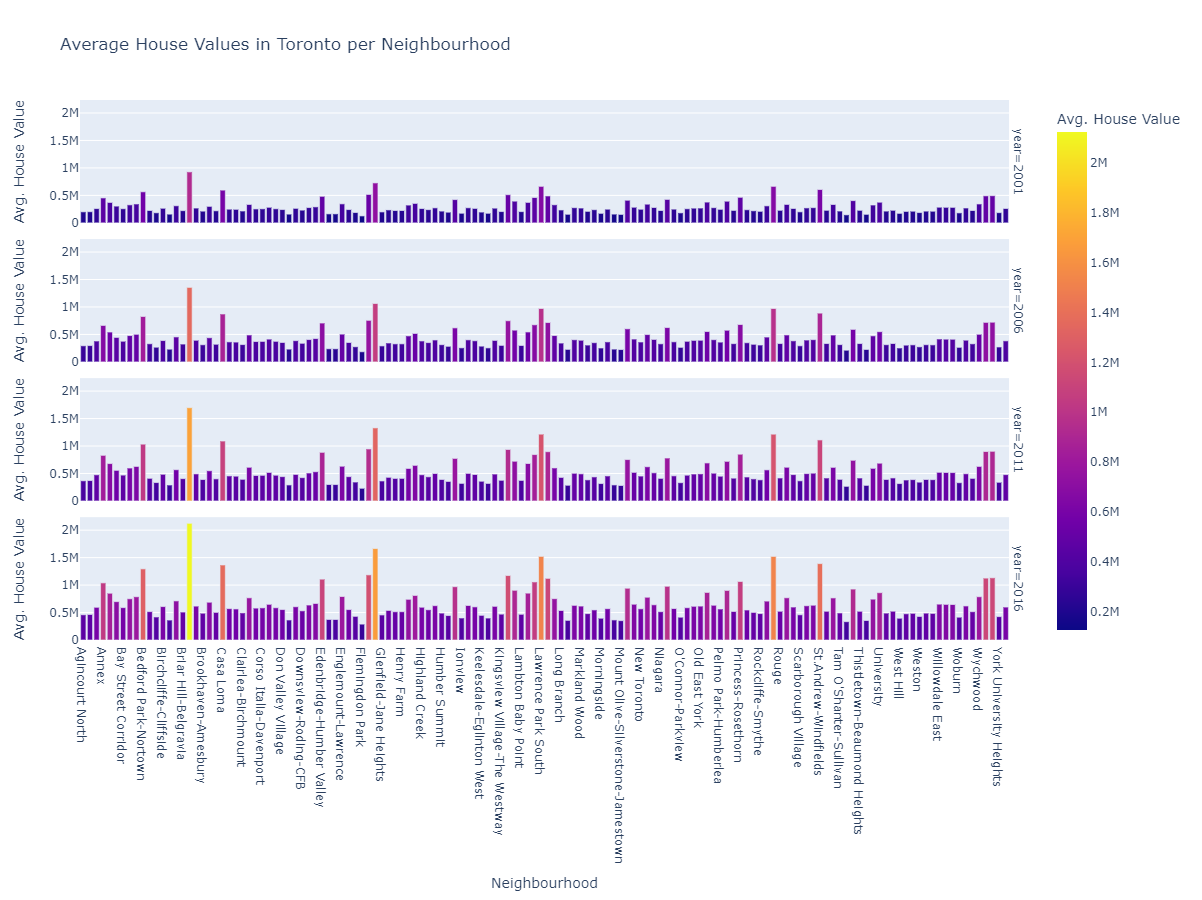

In [27]:
# Create the fig object as a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year
fig = px.bar(avg_house_price_by_neighbourhood_reset, 
    title="Average House Values in Toronto per Neighbourhood", 
    x="neighbourhood", 
    y="average_house_value",
    color="average_house_value",
    facet_row="year",
        labels={
            "average_house_value": "Avg. House Value",
            "neighbourhood": "Neighbourhood",
            },
    height = 900,
    width = 900
)

# Show the facet plot
fig.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [28]:
# Fetch the data from all expensive neighbourhoods per year.
# Create a list of the top 10 most expensive neighbourhoods as determined in the average_house_value_by_neighborhood_top10 section
average_house_value_by_neighborhood_top10_list = average_house_value_by_neighborhood_top10.index.values.tolist()

# Create a new dataframe that has shelter_costs_owned per year for each neighbourhood
to_data_shelter_cost_owned = to_data[["neighbourhood","shelter_costs_owned"]].groupby(["neighbourhood","year"]).mean()

# To be able to use this data frame for the sunburst plot we will first reset the index of this data frame then plot
# The index reset is required as you are not able to pass multi indexed data to plotly.express 
to_data_shelter_cost_owned_reset = to_data_shelter_cost_owned.reset_index()

# Create a new dataframe that contains only neighbouhoods that are in the average_house_value_by_neighborhood_top10_list
to_data_shelter_cost_owned_top10_neighbourhoods = to_data_shelter_cost_owned_reset.loc[to_data_shelter_cost_owned_reset["neighbourhood"].isin(average_house_value_by_neighborhood_top10_list)]
to_data_shelter_cost_owned_top10_neighbourhoods.head()

neighbourhood  year  shelter_costs_owned
36               Bedford Park-Nortown  2001                933.0
37               Bedford Park-Nortown  2006               1808.0
38               Bedford Park-Nortown  2011               1988.0
39               Bedford Park-Nortown  2016               2418.0
64  Bridle Path-Sunnybrook-York Mills  2001               1983.0

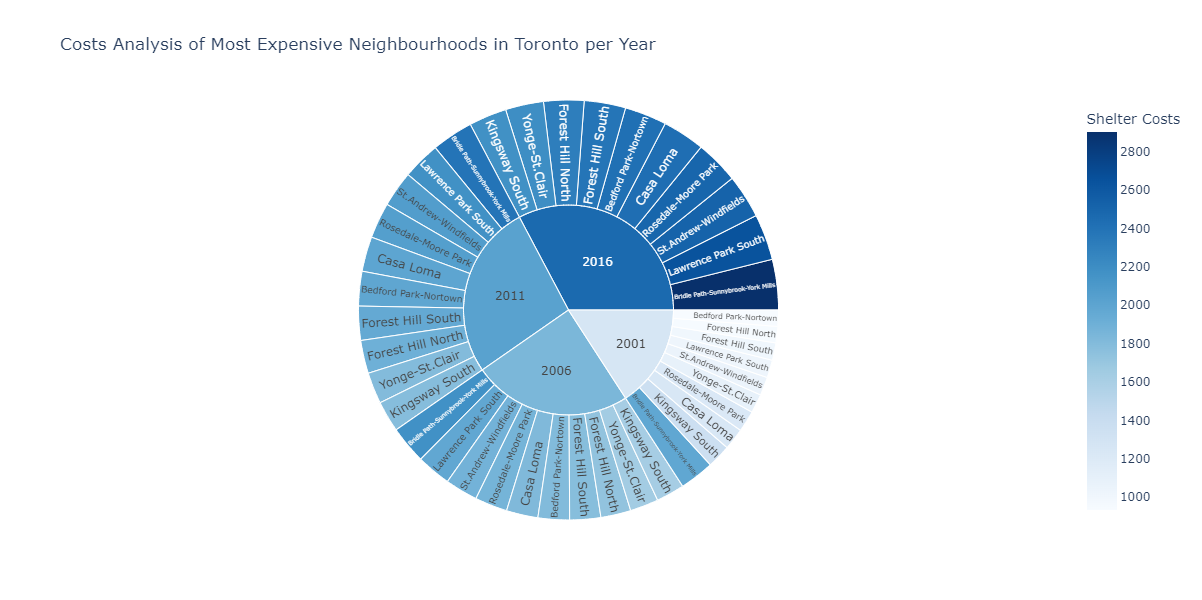

In [29]:
# Create the sunburst chart using the to_data_shelter_cost_owned_top10_neighbourhoods data frame 
fig_sb = px.sunburst(
    to_data_shelter_cost_owned_top10_neighbourhoods, 
    title="Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year ",
    path=["year","neighbourhood"],
    values="shelter_costs_owned",
    color_continuous_scale=px.colors.sequential.Blues,
    height = 600,
    width = 700,
    color="shelter_costs_owned",
        labels={
            "shelter_costs_owned": "Shelter Costs",
            }
)

fig_sb.show()